<a href="https://colab.research.google.com/github/Rinarsm/Pengolahan-Citra-Digital/blob/main/UTS_Pengolahan_Citra_Digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

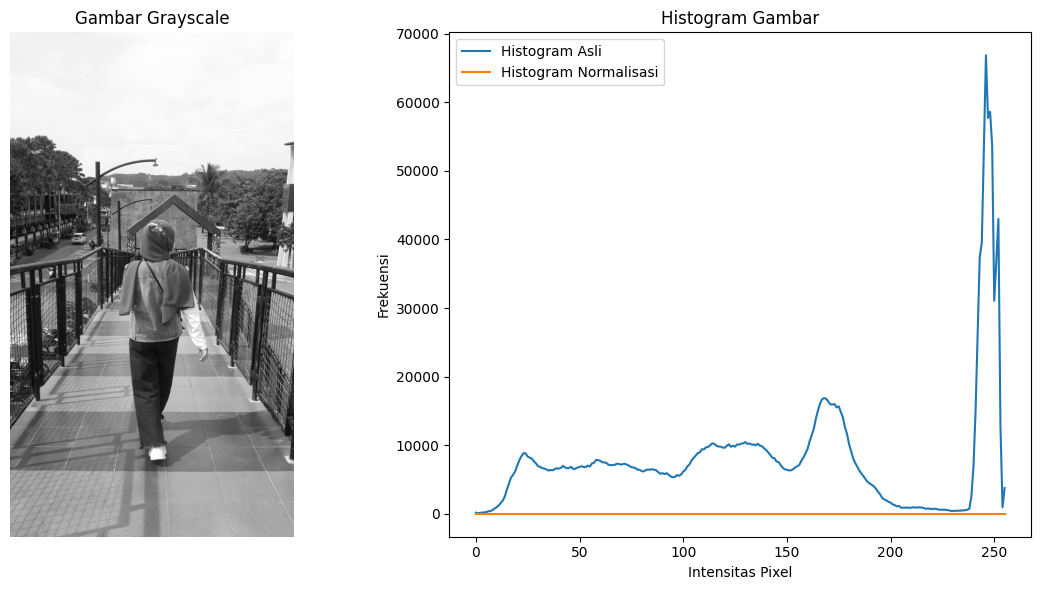

In [ ]:
#Histogram Citra

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar grayscale
image_path = "aku.jpg"  # Ganti dengan path ke file gambar Anda
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Gambar tidak ditemukan. Pastikan path gambar benar.")
    exit()

# Menghitung histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Normalisasi histogram
histogram_normalized = histogram / histogram.sum()

# Plot gambar asli dan histogram
plt.figure(figsize=(12, 6))

# Menampilkan gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Grayscale")
plt.axis('off')

# Menampilkan histogram
plt.subplot(1, 2, 2)
plt.plot(histogram, label='Histogram Asli')
plt.plot(histogram_normalized, label='Histogram Normalisasi')
plt.title("Histogram Gambar")
plt.xlabel("Intensitas Pixel")
plt.ylabel("Frekuensi")
plt.legend()

plt.tight_layout()
plt.show()

Langkah-langkah yang dilakukan untuk menghitung histogram dan menampilkan hasilnya adalah sebagai berikut:

Langkah pertama adalah membaca gambar dalam format grayscale menggunakan fungsi dari library OpenCV. Format grayscale dipilih agar setiap piksel hanya memiliki satu nilai intensitas, yaitu antara 0 (hitam) hingga 255 (putih).

Setelah gambar dibaca, histogram gambar dihitung menggunakan fungsi bawaan dari OpenCV. Histogram ini merepresentasikan jumlah piksel pada setiap nilai intensitas dalam gambar, dengan 256 bin yang masing-masing mewakili nilai dari 0 hingga 255.

Langkah berikutnya adalah melakukan normalisasi histogram. Normalisasi dilakukan dengan membagi setiap nilai pada histogram dengan total jumlah piksel dalam gambar. Hasilnya adalah histogram dalam bentuk probabilitas, di mana jumlah total nilai dalam histogram menjadi 1.

Visualisasi hasil dilakukan menggunakan library Matplotlib. Gambar asli ditampilkan untuk memberikan konteks visual, sedangkan histogram asli dan hasil normalisasi ditampilkan dalam bentuk grafik. Histogram asli menunjukkan jumlah piksel untuk setiap nilai intensitas, sedangkan histogram normalisasi menunjukkan distribusi relatif intensitas piksel.

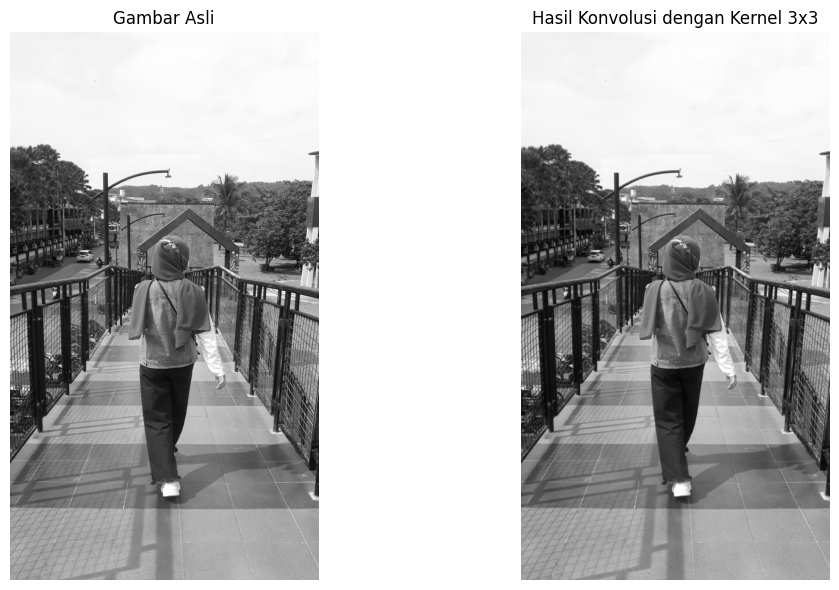

In [ ]:
#Operasi Konvolusi dengan Kernel Sederhana

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar grayscale
image_path = "aku.jpg"  # Ganti dengan path ke file gambar Anda
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Gambar tidak ditemukan. Pastikan path gambar benar.")
    exit()

# Membuat kernel rata-rata 3x3
kernel = np.ones((3, 3), np.float32) / 9

# Operasi konvolusi menggunakan filter2D
convolved_image = cv2.filter2D(image, -1, kernel)

# Plot gambar asli dan hasil konvolusi
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Gambar hasil konvolusi
plt.subplot(1, 2, 2)
plt.imshow(convolved_image, cmap='gray')
plt.title("Hasil Konvolusi dengan Kernel 3x3")
plt.axis('off')

plt.tight_layout()
plt.show()


Langkah-langkah yang dilakukan untuk menerapkan operasi konvolusi pada gambar menggunakan kernel rata-rata 3x3 adalah sebagai berikut:

Langkah pertama adalah membaca gambar dalam format grayscale menggunakan OpenCV. Format grayscale dipilih agar pengolahan dilakukan pada satu channel saja, dengan nilai intensitas piksel antara 0 hingga 255.

Setelah gambar dibaca, kernel rata-rata 3x3 dibuat. Kernel ini adalah matriks berukuran 3x3 yang semua elemennya memiliki nilai 1/9. Nilai ini memastikan bahwa setiap piksel dalam area kernel memiliki kontribusi yang sama dalam menghasilkan nilai piksel baru.

Operasi konvolusi dilakukan dengan menggunakan fungsi cv2.filter2D. Fungsi ini mengaplikasikan kernel yang telah dibuat pada setiap area dalam gambar. Hasil dari konvolusi adalah gambar baru di mana setiap piksel dihitung berdasarkan rata-rata dari piksel di sekitar dalam area kernel.

Hasil konvolusi divisualisasikan menggunakan Matplotlib. Gambar asli ditampilkan di sebelah kiri untuk memberikan perbandingan, sedangkan hasil konvolusi ditampilkan di sebelah kanan.

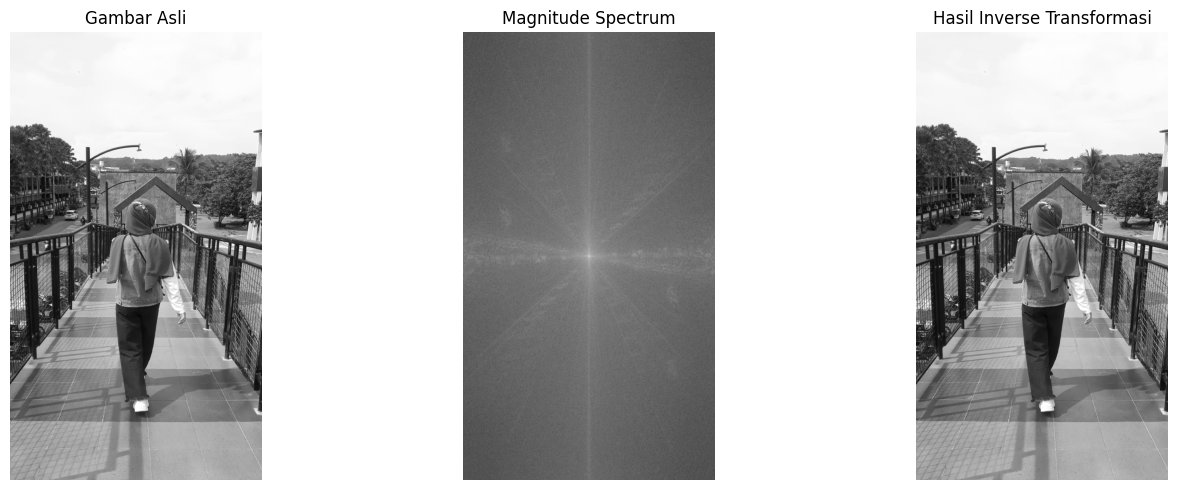

In [ ]:
#Transformasi Fourier

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar grayscale
image_path = "aku.jpg"  # Ganti dengan path ke file gambar Anda
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Gambar tidak ditemukan. Pastikan path gambar benar.")
    exit()

# Transformasi Fourier
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Menghitung magnitude spectrum
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]) + 1)

# Inverse Transformasi Fourier
f_ishift = np.fft.ifftshift(dft_shift)
image_reconstructed = cv2.idft(f_ishift)
image_reconstructed = cv2.magnitude(image_reconstructed[:, :, 0], image_reconstructed[:, :, 1])

# Plot gambar asli, magnitude spectrum, dan hasil inverse
plt.figure(figsize=(15, 5))

# Gambar asli
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Magnitude spectrum
plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')

# Gambar hasil inverse
plt.subplot(1, 3, 3)
plt.imshow(image_reconstructed, cmap='gray')
plt.title("Hasil Inverse Transformasi")
plt.axis('off')

plt.tight_layout()
plt.show()


Langkah-langkah yang dilakukan untuk menerapkan Transformasi Fourier pada gambar grayscale dan menampilkan hasilnya adalah sebagai berikut:

Langkah pertama adalah membaca gambar dalam format grayscale menggunakan OpenCV. Gambar dalam format grayscale memiliki nilai intensitas piksel antara 0 hingga 255, yang mempermudah analisis dan pengolahan.

Transformasi Fourier diterapkan pada gambar menggunakan fungsi cv2.dft. Transformasi ini mengubah gambar dari domain spasial (berdasarkan posisi piksel) menjadi domain frekuensi, di mana informasi frekuensi tinggi dan rendah gambar dapat dianalisis.

Hasil Transformasi Fourier diubah posisinya menggunakan np.fft.fftshift. Langkah ini memindahkan komponen frekuensi rendah ke pusat dan frekuensi tinggi ke tepi, membuatnya lebih mudah untuk dianalisis.

Magnitude spectrum dihitung untuk menampilkan distribusi energi pada berbagai frekuensi. Fungsi cv2.magnitude digunakan untuk menghitung magnitude dari hasil transformasi, dan skala logaritmik diterapkan untuk membuat nilai lebih terlihat pada visualisasi.

Inverse Transformasi Fourier dilakukan untuk mengembalikan gambar dari domain frekuensi ke domain spasial menggunakan cv2.idft. Hasilnya adalah gambar yang direkonstruksi kembali dari informasi frekuensi yang ada.

Visualisasi dilakukan menggunakan Matplotlib. Gambar asli, magnitude spectrum, dan hasil inverse transformasi ditampilkan secara berdampingan untuk memberikan perbandingan dan pemahaman tentang proses transformasi.

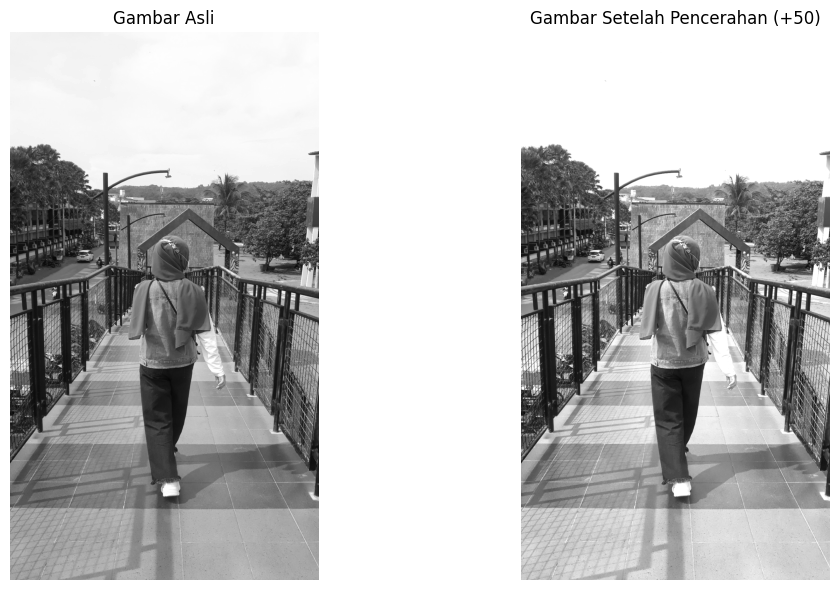

In [ ]:
#Operasi Aritmatika Citra - Pencerahan

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar grayscale
image_path = "aku.jpg"  # Ganti dengan path ke file gambar Anda
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Gambar tidak ditemukan. Pastikan path gambar benar.")
    exit()

# Konstanta pencerahan
brightness_constant = 50

# Operasi pencerahan dengan clipping
brightened_image = cv2.add(image, brightness_constant)

# Plot gambar asli dan hasil pencerahan
plt.figure(figsize=(12, 6))

# Gambar asli
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Gambar Asli")
plt.axis('off')

# Gambar hasil pencerahan
plt.subplot(1, 2, 2)
plt.imshow(brightened_image, cmap='gray')
plt.title(f"Gambar Setelah Pencerahan (+{brightness_constant})")
plt.axis('off')

plt.tight_layout()
plt.show()


Langkah-langkah yang dilakukan untuk menerapkan operasi aritmatika pencerahan pada citra grayscale adalah sebagai berikut:

Langkah pertama adalah membaca gambar dalam format grayscale menggunakan OpenCV. Gambar dalam format grayscale digunakan agar pengolahan dilakukan pada satu channel dengan nilai intensitas piksel antara 0 hingga 255.

Konstanta pencerahan didefinisikan untuk menentukan seberapa besar nilai yang akan ditambahkan ke setiap piksel dalam gambar. Dalam kasus ini, konstanta bernilai 50, artinya setiap piksel dalam gambar akan dinaikkan intensitasnya sebesar 50.

Operasi pencerahan dilakukan menggunakan fungsi cv2.add, yang secara otomatis melakukan operasi penjumlahan piksel dan menerapkan clipping. Clipping memastikan bahwa nilai piksel yang dihasilkan tidak melebihi batas maksimum intensitas (255), sehingga mencegah distorsi pada gambar.

Hasil operasi divisualisasikan menggunakan Matplotlib. Gambar asli ditampilkan untuk memberikan konteks, sedangkan hasil pencerahan ditampilkan untuk menunjukkan perubahan yang terjadi pada gambar.